In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

df = pd.read_csv("D2.csv")

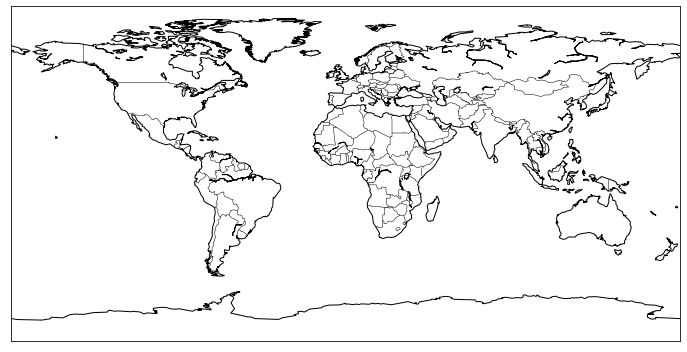

In [17]:
map_plotter = Basemap()

fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

In [18]:
df[["latitude","longitude"]].describe()

,latitude,longitude
count,584.000000,584.000000
mean,24.560794,-31.352097
std,22.808836,81.115247
min,-37.905610,-156.506040
25%,13.303350,-86.806942
50%,32.509310,-75.030985
75%,40.701768,10.323070
max,59.938630,179.364510


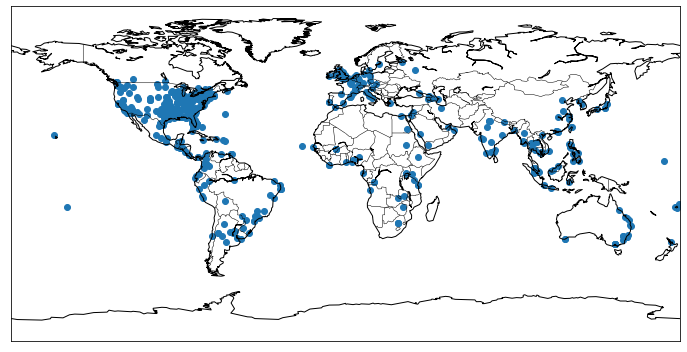

In [19]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(df["longitude"], df["latitude"], latlon=True)
plt.show()


In [60]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=6,min_samples=5)

clusters = dbscan_model.fit_predict(df[["longitude","latitude"]])
df["cluster"] = clusters

colors = ["r", "g", "b", "m", "c", "y"]
colors = ["k"] + colors + colors + colors
print(max(clusters))
clrs = [colors[cluster+1] for cluster in clusters]

14


In [63]:
df

,headline,cities,latitude,longitude,countrycode,cluster
0,Zika Outbreak Hits Miami\n,Miami,25.77427,-80.19366,US,0
1,Could Zika Reach New York City?\n,New York City,40.71427,-74.00597,US,0
2,First Case Zika in Miami Beach\n,Miami,25.77427,-80.19366,US,0
3,"Mystery Virus Spreads in Recife, Brazil\n",Recife,-8.05389,-34.88111,BR,1
4,Dallas man comes down with case Zika\n,Dallas,32.78306,-96.80667,US,0
5,Trinidad confirms first Zika case\n,Trinidad,-14.83333,-64.90000,BO,-1
6,Zika Concerns are Spreading in Houston\n,Houston,29.76328,-95.36327,US,0
7,The CDC in Atlanta is Growing Worried\n,Atlanta,33.74900,-84.38798,US,0
8,Brownsville teen contracts Zika virus\n,Brownsville,25.82176,-80.24116,US,0
9,Mosquito control efforts in St. Louis take new...,St. Louis,38.62727,-90.19789,US,0


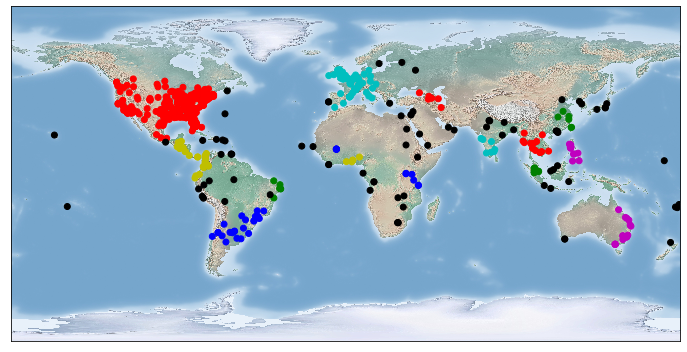

In [65]:
fig = plt.figure(figsize=(12, 8))
#map_plotter.drawcoastlines()
#map_plotter.drawcountries()
map_plotter.scatter(df["longitude"], df["latitude"], latlon=True, color=clrs)
map_plotter.shadedrelief()
plt.show()